In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import pandas.testing as tm
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [2]:
df = pd.read_csv(r'D:\Masters\DMML\Project\Datasets\Germany cleaned.csv',encoding="ISO-8859-1")

In [3]:
df

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manual,190,golf,125000,5,diesel,audi,yes
1,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,no
2,GOLF_4_1_4__3TÃÂRER,1500,test,smallcar,2001,manual,75,golf,150000,6,petrol,volkswagen,no
3,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,smallcar,2008,manual,69,fabia,90000,7,diesel,skoda,no
4,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manual,102,3er,150000,10,petrol,bmw,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
311961,turbo_defekt,3200,control,limousine,2004,manual,225,leon,150000,5,petrol,seat,yes
311962,Smart_smart_leistungssteigerung_100ps,1199,test,convertible,2000,automatic,101,fortwo,125000,3,petrol,smart,no
311963,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manual,102,transporter,150000,3,diesel,volkswagen,no
311964,VW_Golf_Kombi_1_9l_TDI,3400,test,stationwagon,2002,manual,100,golf,150000,6,diesel,volkswagen,no


In [4]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,311966.000000,311966.000000,311966.000000,311966.000000,311966.000000
mean,6280.683097,2003.602143,127.681459,125367.299642,6.191341
std,7759.600587,7.028568,64.878345,39228.603464,3.341287
min,300.000000,1910.000000,20.000000,5000.000000,1.000000
25%,1500.000000,1999.000000,82.000000,100000.000000,3.000000
50%,3500.000000,2004.000000,116.000000,150000.000000,6.000000
75%,8000.000000,2008.000000,150.000000,150000.000000,9.000000
max,100000.000000,2017.000000,1500.000000,150000.000000,12.000000


In [5]:
df.shape

(311966, 13)

In [6]:
df.loc[df['price']<=2000,'price class']='low'
df.loc[df['price']>=8000,'price class']='high'
df.loc[(df['price']>2000) & (df['price']<8000),'price class']='mid'

In [7]:
df['price class'].value_counts()

mid     126892
low     106754
high     78320
Name: price class, dtype: int64

In [8]:
df.columns

Index(['name', 'price', 'abtest', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration',
       'fuelType', 'brand', 'notRepairedDamage', 'price class'],
      dtype='object')

In [9]:
df1=df.groupby('price class').sample(50000)

In [10]:
df1['price class'].value_counts()

high    50000
low     50000
mid     50000
Name: price class, dtype: int64

In [11]:
df2 = df1.copy()

In [12]:
X=df2.iloc[:,:-1]
Y=df2['price class']

In [13]:
X.head()

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
113642,Auto_zu_verkaufen,12300,control,limousine,2008,manual,144,a4,70000,3,petrol,audi,no
129941,BMW_745d,14999,control,limousine,2008,automatic,329,7er,150000,2,diesel,bmw,no
306227,Opel_Insignia_2.0_CDTI_Sports_Tourer_Sport,11500,test,stationwagon,2010,automatic,160,insignia,150000,5,diesel,opel,no
203669,Top_Cabrio_von_bmw_fuer_nur_9599Ã¢ÂÂ¬_vb,9599,control,convertible,2003,automatic,192,3er,100000,6,petrol,bmw,no
141771,BMW_118i_Cabrio_Teilleder_Klimatronik_PDC_116t...,9850,control,convertible,2008,manual,143,1er,125000,8,petrol,bmw,no


In [14]:
Y.head()

113642    high
129941    high
306227    high
203669    high
141771    high
Name: price class, dtype: object

In [15]:
X.drop(['name','price'],axis=1,inplace=True)

In [16]:
X.columns

Index(['abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage'],
      dtype='object')

In [17]:
X_encoded=pd.get_dummies(X)

In [18]:
X_encoded.head()

,yearOfRegistration,powerPS,kilometer,monthOfRegistration,abtest_control,abtest_test,vehicleType_bus,vehicleType_convertible,vehicleType_coupe,vehicleType_limousine,...,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_no,notRepairedDamage_yes
113642,2008,144,70000,3,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
129941,2008,329,150000,2,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
306227,2010,160,150000,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
203669,2003,192,100000,6,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
141771,2008,143,125000,8,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder=LabelEncoder()

In [21]:
Y_encoded=label_encoder.fit_transform(Y)

In [22]:
Y_encoded

array([0, 0, 0, ..., 2, 2, 2])

# Splitting dataset

In [23]:
# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded , Y_encoded, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (120000, 314)
Shape of testing feature: (30000, 314)
Shape of training label: (120000,)
Shape of training label: (30000,)


Accuracy on training set: 0.985
Accuracy on validation set: 0.849
F1-score: 0.848624569319135
[[9093   46  914]
 [  45 8790 1255]
 [ 881 1396 7580]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     10053
           1       0.86      0.87      0.87     10090
           2       0.78      0.77      0.77      9857

    accuracy                           0.85     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.85      0.85      0.85     30000



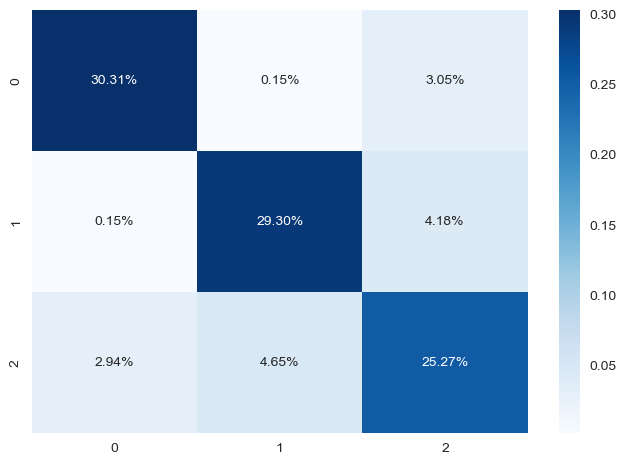

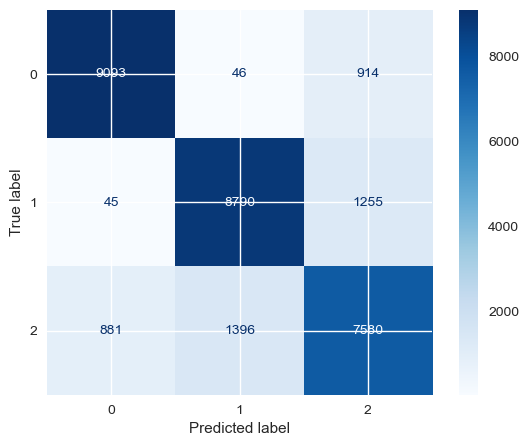

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))

print("Accuracy on validation set: {:.3f}".format(rf.score(X_test, y_test)))

y_pred_rf = rf.predict(X_test)

from sklearn.metrics import confusion_matrix
Confmat_rf = confusion_matrix(y_test,y_pred_rf)
Confmat_rf = sns.heatmap(Confmat_rf/np.sum(Confmat_rf),annot=True, 
            fmt='.2%', cmap='Blues')

from sklearn.metrics import classification_report,confusion_matrix,f1_score
f1_score = f1_score(y_test, y_pred_rf, average='weighted')
print("F1-score:", f1_score)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(rf,X_test,y_test,cmap=plt.cm.Blues)
plt.gcf().set_size_inches(7, 5)

In [25]:
df3 = pd.DataFrame({'Prediction': y_pred_rf})
df3.to_csv(r'D:\Masters\DMML\Project\Predictions\GER RF SKL.csv', index = False)

In [26]:
import lightgbm as lgb

# Define the random forest model parameters
rf_params = {
    'boosting_type':'rf', 
    'num_leaves':31, 
    'max_depth':-1,
    'n_estimators':100, 
    'bagging_freq':1, 
    'bagging_fraction':0.8,
    'feature_fraction':0.8, 
    'random_state':42
}

# Initialize the random forest model
rf = lgb.LGBMClassifier(**rf_params)

# Train the random forest model
rf.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score,f1_score
report = classification_report(y_test, rf_pred)
f1_score = f1_score(y_test, rf_pred, average='weighted')
accuracy = accuracy_score(y_test, rf_pred)
print('Classification Report:')
print(report)
print("F1-score:", f1_score)
print('Accuracy:', accuracy)


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     10053
           1       0.82      0.86      0.84     10090
           2       0.73      0.70      0.72      9857

    accuracy                           0.81     30000
   macro avg       0.81      0.81      0.81     30000
weighted avg       0.81      0.81      0.81     30000

F1-score: 0.811012470358832
Accuracy: 0.8118


In [27]:
df4 = pd.DataFrame({'Prediction': rf_pred})
df4.to_csv(r'D:\Masters\DMML\Project\Predictions\GER RF LGB.csv', index = False)

Accuracy on training set: 0.872
Accuracy on validation set: 0.818
F1-score: 0.817466731357799
[[8987   78  988]
 [ 114 8457 1519]
 [1258 1499 7100]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     10053
           1       0.84      0.84      0.84     10090
           2       0.74      0.72      0.73      9857

    accuracy                           0.82     30000
   macro avg       0.82      0.82      0.82     30000
weighted avg       0.82      0.82      0.82     30000



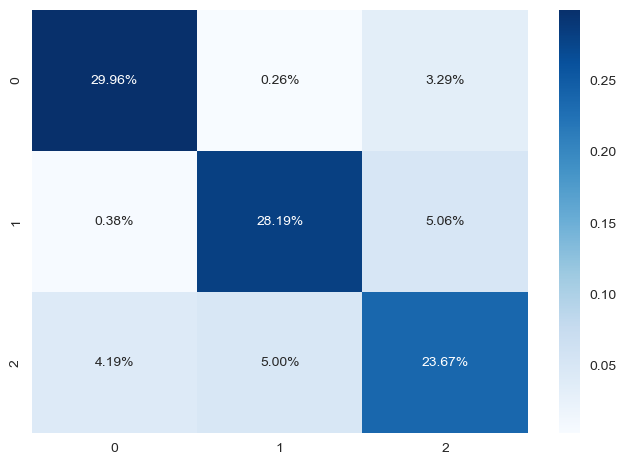

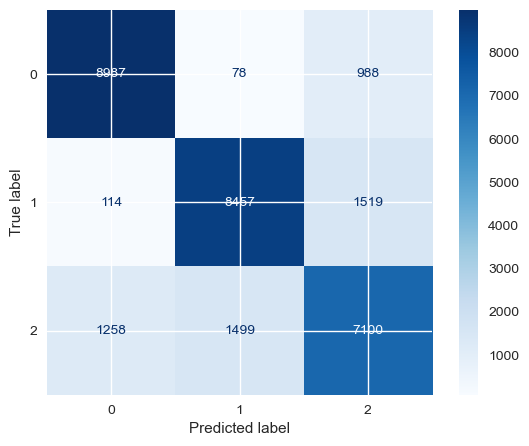

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))

print("Accuracy on validation set: {:.3f}".format(knn.score(X_test, y_test)))

y_pred_KNN = knn.predict(X_test)

Confmat_KNN = confusion_matrix(y_test,y_pred_KNN)
Confmat_KNN = sns.heatmap(Confmat_KNN/np.sum(Confmat_KNN),annot=True, 
            fmt='.2%', cmap='Blues')

from sklearn.metrics import classification_report,confusion_matrix,f1_score
f1_score = f1_score(y_test, y_pred_KNN, average='weighted')
print("F1-score:", f1_score)
print(confusion_matrix(y_test,y_pred_KNN))
print(classification_report(y_test,y_pred_KNN))

from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(knn,X_test,y_test,cmap=plt.cm.Blues)
plt.gcf().set_size_inches(7, 5)

In [29]:
df5 = pd.DataFrame({'Prediction': y_pred_KNN})
df5.to_csv(r'D:\Masters\DMML\Project\Predictions\GER KNN SKL.csv', index = False)

In [30]:
import lightgbm as lgb

# Define the KNN model parameters
knn_params = {
    'boosting_type': 'gbdt',
    'n_neighbors': 5,
    'num_leaves': 31,
    'n_estimators': 100,
    'random_state': 42
}

# Initialize the KNN model
knn = lgb.LGBMClassifier(**knn_params)

# Train the KNN model
knn.fit(X_train, y_train)

# Make predictions on the test set
knn_pred = knn.predict(X_test)


from sklearn.metrics import classification_report, accuracy_score,f1_score
report = classification_report(y_test,knn_pred)
accuracy = accuracy_score(y_test, knn_pred)
f1_score = f1_score(y_test, knn_pred, average='weighted')
print('Classification Report:')
print(report)
print("F1-score:", f1_score)
print('Accuracy:', accuracy)

[LightGBM] [Warning] Unknown parameter: n_neighbors
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     10053
           1       0.87      0.88      0.87     10090
           2       0.79      0.78      0.78      9857

    accuracy                           0.86     30000
   macro avg       0.86      0.86      0.86     30000
weighted avg       0.86      0.86      0.86     30000

F1-score: 0.8557279603117831
Accuracy: 0.856


In [31]:
df6 = pd.DataFrame({'Prediction': knn_pred})
df6.to_csv(r'D:\Masters\DMML\Project\Predictions\GER KNN LGB.csv', index = False)